In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Importing data

In [4]:
df=pd.read_csv(r"C:\Users\DELL\Documents\Downloads\Excelr\delivery_time.csv")

In [5]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Performing EDA On Data

In [6]:
df1 = df.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'}, axis = 1)
df1

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Checking Datatype

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [8]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


# Checking for Null Values

In [10]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

# Plotting the data to check for outliers

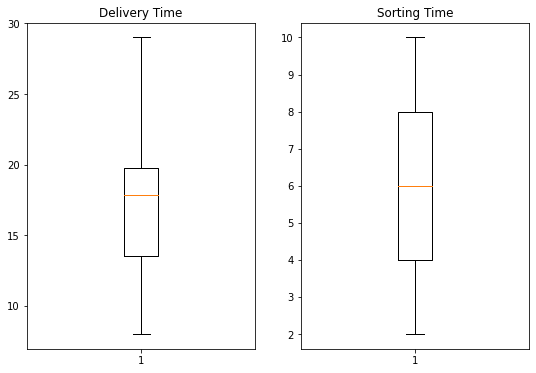

In [11]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(df['Delivery Time'])
plt.title('Delivery Time')
plt.subplot(122)
plt.boxplot(df['Sorting Time'])
plt.title('Sorting Time')
plt.show()

# Checking the Correlation between variables

In [12]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

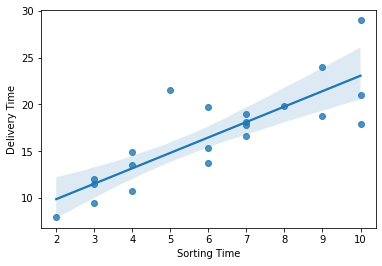

In [13]:
sns.regplot(x=df['Sorting Time'],y=df['Delivery Time'])

There is good correlation between the two variable.
The score is more than 0.8 which is a good sign

# Feature Engineering

Trying different transformation of data to estimate normal distribution and to remove any skewness

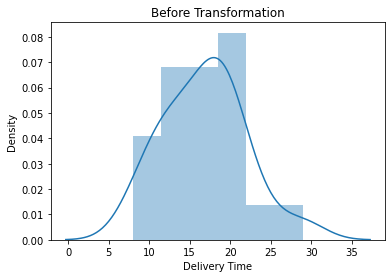

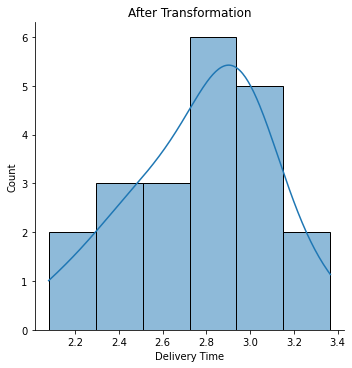

In [14]:
sns.distplot(df['Delivery Time'], bins = 6, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(df['Delivery Time']), bins = 6, kde = True)
plt.title('After Transformation')
plt.show()

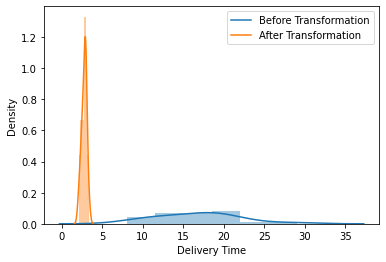

In [15]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['Delivery Time'], bins = 6, kde = True)
sns.distplot(np.log(df['Delivery Time']), bins = 6, kde = True)
plt.legend(labels)
plt.show()

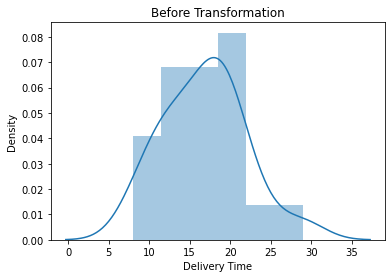

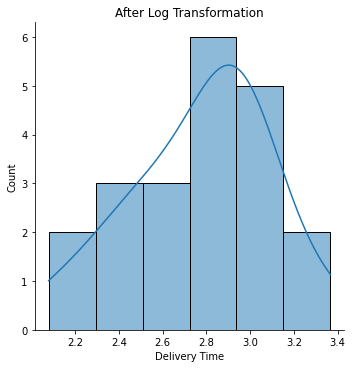

In [16]:
sns.distplot(df['Delivery Time'], bins = 6, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(df['Delivery Time']), bins = 6, kde = True)
plt.title('After Log Transformation')
plt.show()

How log transformation affects the data and it scales the values down.
Before prediction it is necessary to reverse scaled the values, even for calculating RMSE for the models.(Errors)

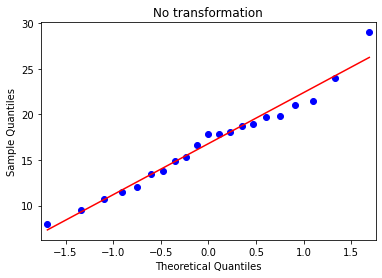

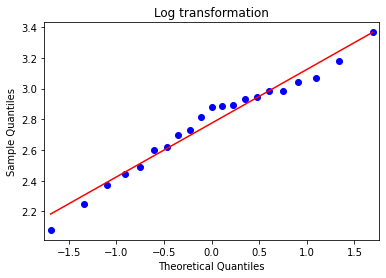

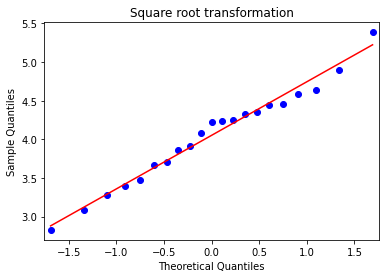

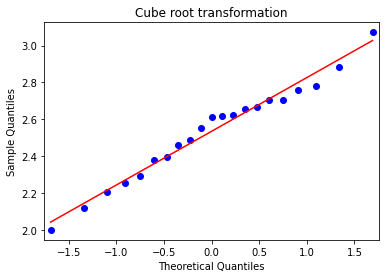

In [17]:
smf.qqplot(df['Delivery Time'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(df['Delivery Time']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(df['Delivery Time']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(df['Delivery Time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

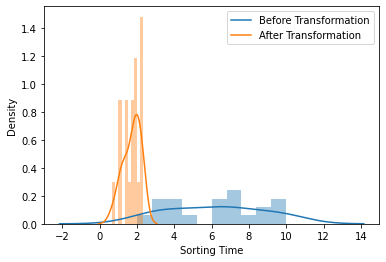

In [18]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['Sorting Time'], bins = 10, kde = True)
sns.distplot(np.log(df['Sorting Time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

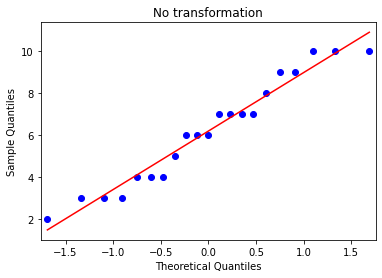

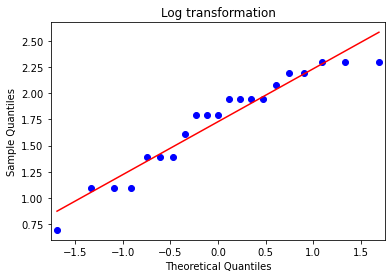

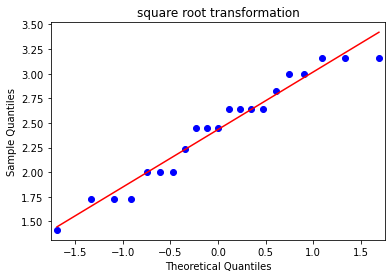

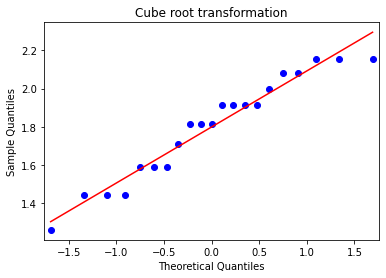

In [19]:
smf.qqplot(df['Sorting Time'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(df['Sorting Time']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(df['Sorting Time']), line = 'r')
plt.title('square root transformation')
smf.qqplot(np.cbrt(df['Sorting Time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

We only Perform any data transformation when the data is skewed or not normal

# Model Testing

In [21]:
model = sm.ols('Delivery_Time~Sorting_Time', data = df1).fit()

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 11 Oct 2022   Prob (F-statistic):           3.98e-06
Time:                        14:29:36   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [24]:
print(model.tvalues,'\n',model.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [25]:
model.rsquared,model.rsquared_adj


(0.6822714748417231, 0.6655489208860244)

In [26]:
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [27]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [28]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


# Predicitng from Original Model without any data transformation

In [33]:
predicted1 = pd.DataFrame()
predicted1['Sorting_Time'] = df1.Sorting_Time
predicted1['Delivery_Time'] = df1.Delivery_Time
predicted1['Predicted_Delivery_Time'] = pd.DataFrame(model.predict(predicted1.Sorting_Time))
predicted1

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913
